In [1]:
from nilearn import plotting

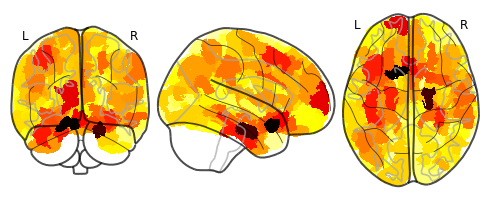

In [8]:
plotting.plot_glass_brain('2nd_level_maps/2nd_level_maps/diff/2nd_level_map_perm_corrected_stat_alpha.nii.gz')

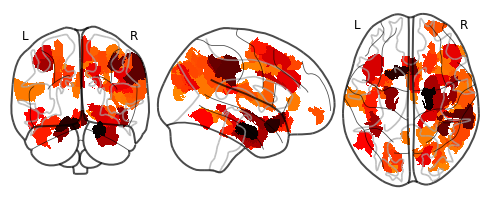

In [10]:
plotting.plot_glass_brain('2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_theta.nii.gz')

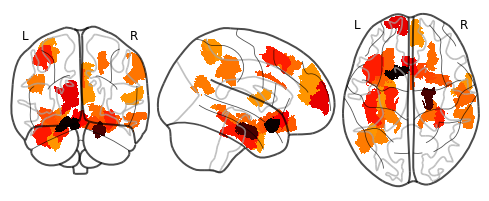

In [5]:
plotting.plot_glass_brain('2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_alpha.nii.gz')

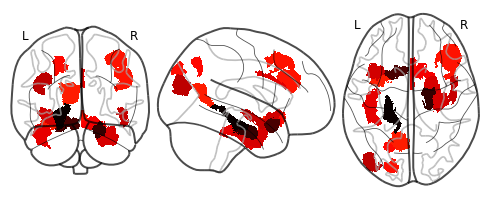

In [6]:
plotting.plot_glass_brain('2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_low_beta.nii.gz')

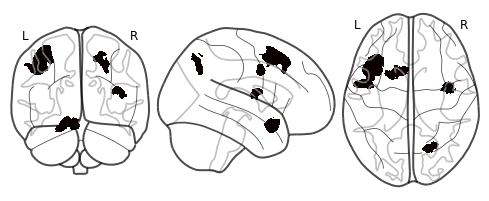

In [7]:
plotting.plot_glass_brain('2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_high_beta.nii.gz')

In [2]:
from nilearn import datasets

yeo  = datasets.fetch_atlas_yeo_2011()

In [3]:
from nilearn.maskers import NiftiLabelsMasker

yeomasker = NiftiLabelsMasker(yeo.thick_7)
yeomasker.fit()

NiftiLabelsMasker(labels_img='/homes/v20subra/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz')

KeyboardInterrupt: 

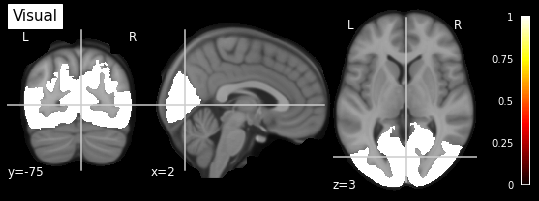

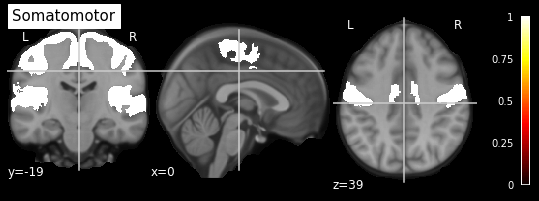

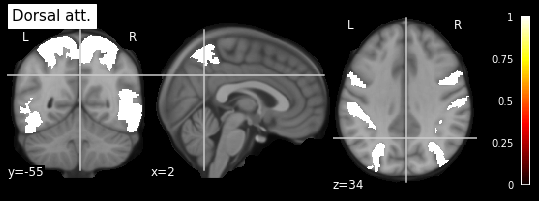

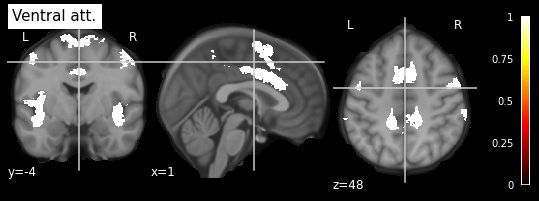

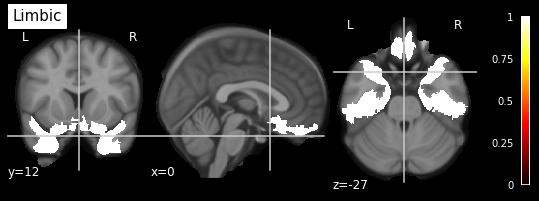

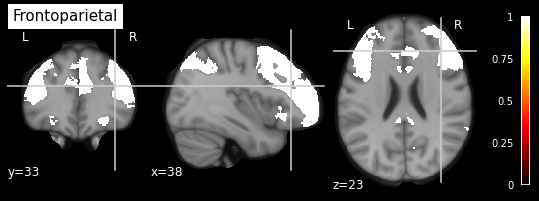

In [14]:
from nilearn.image import math_img

networknames = ['Visual','Somatomotor','Dorsal att.','Ventral att.','Limbic','Frontoparietal','DMN']

for i,curnet in enumerate(networknames):
    curimg = math_img(f"img=={i+1}",img=yeo.thick_7)

    plotting.plot_stat_map(curimg,bg_img=yeo.anat,title=curnet)

AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

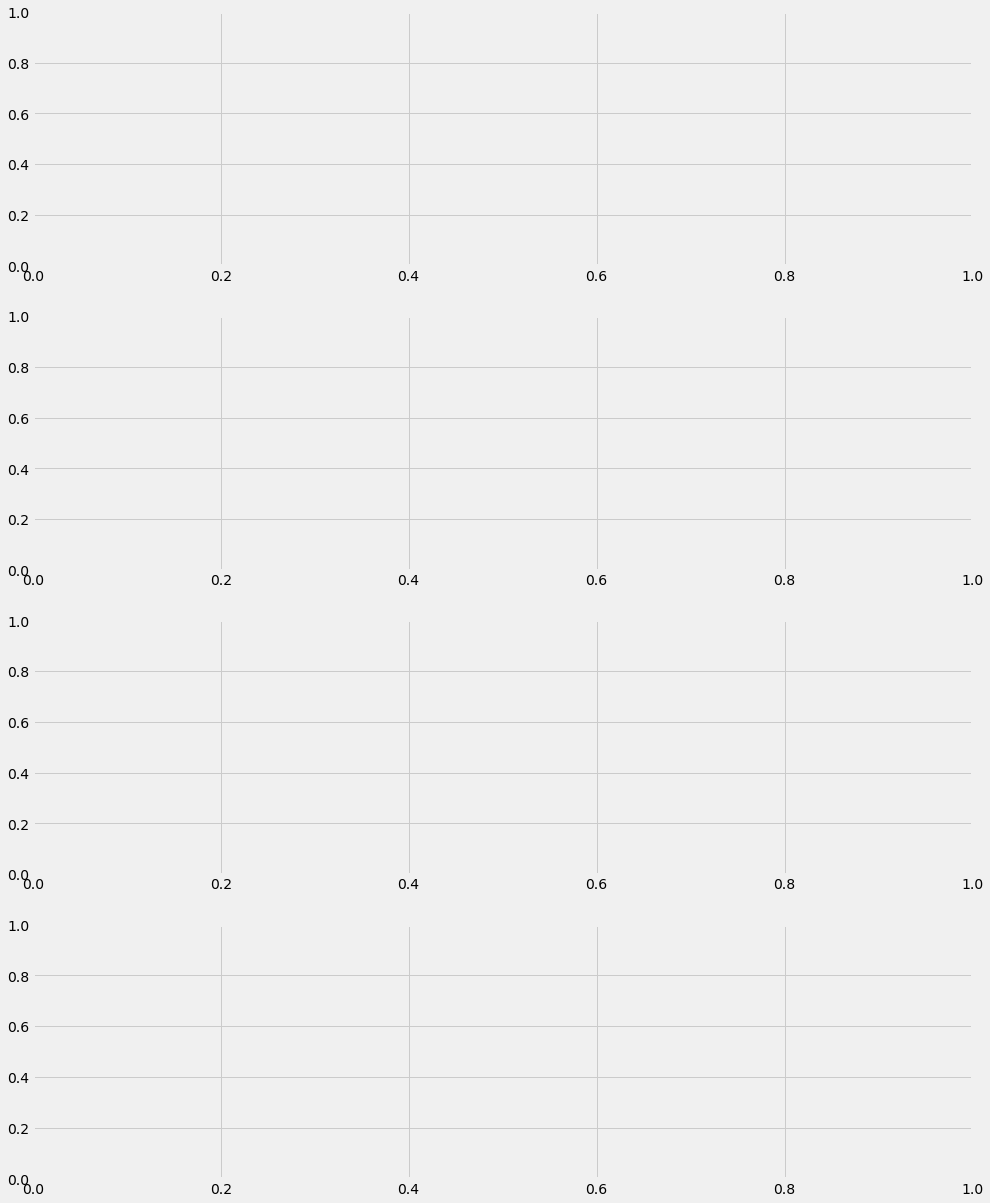

In [7]:
from matplotlib import pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
f,ax = plt.subplots(nrows=4,ncols=1,figsize=(15,20))

networknames = ['Visual','Somatomotor','Dorsal att.','Ventral att.','Limbic','Frontoparietal','DMN']


frequencies = ['theta','alpha','low_beta','high_beta']
for j,curfreq in enumerate(frequencies):
    # cur_BL = yeomasker.fit_transform(f"/homes/v20subra/S4B2/Graph-related_analysis/2nd_level_maps_thresholded_at_0.05/BL/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")
    # cur_PO = yeomasker.fit_transform(f"/homes/v20subra/S4B2/Graph-related_analysis/2nd_level_maps_thresholded_at_0.05/PO/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")
    cur_diff = yeomasker.fit_transform(f"/homes/v20subra/S4B2/Graph-related_analysis/2nd_level_maps_thresholded_at_0.05/PO-BL/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")
    c_h = plt.get_cmap("cold_hot")

    # ax[0,j].bar(networknames,cur_BL[0])
    # ax[0,j].set_xticklabels(networknames, rotation = 45)
    
    # ax[1,j].bar(networknames,cur_PO[0])
    # ax[1,j].set_xticklabels(networknames, rotation = 45)
    
    ax[j].bar(networknames,cur_diff[0],color=c_h.colors)
    # ax[j].axis('off')

ax[3].set_xticklabels(networknames, rotation = 45)
f.savefig('/SDI_results/barplot_SDI_diff.svg')
# ax[0,0].set_ylabel('BASELINE',fontsize=18)
# ax[1,0].set_ylabel('Post Onset',fontsize=18)
# ax[2,0].set_ylabel('Diff',fontsize=18)

ValueError: File not found: '2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/BL/2nd_level_map_perm_corrected_stat_theta.nii.gz'

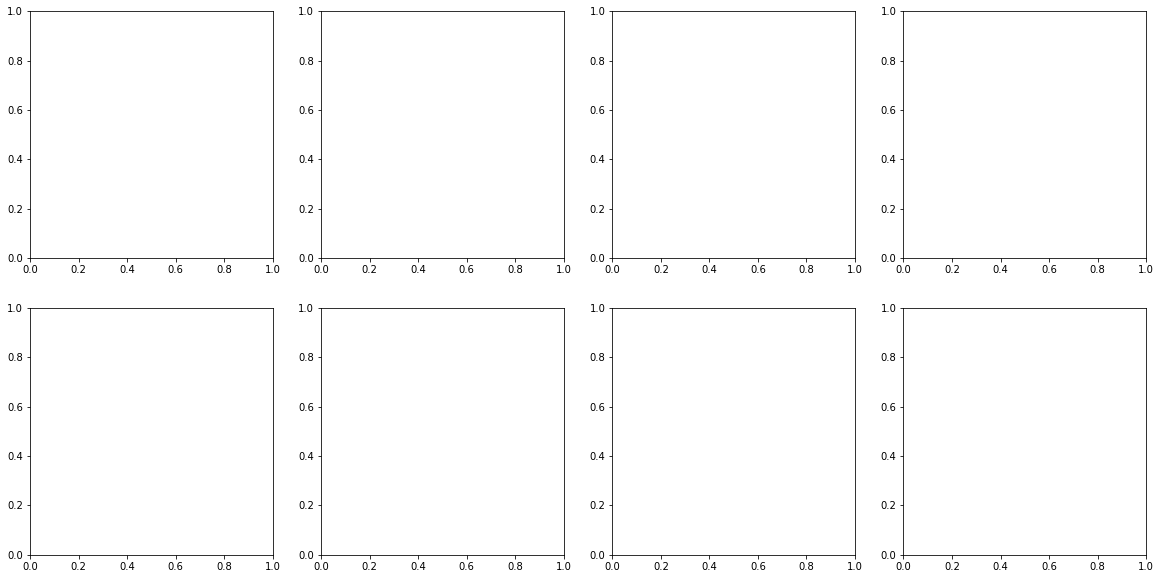

In [6]:
from matplotlib import pyplot as plt

f,ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
networknames = ['Visual','Somatomotor','Dorsal att.','Ventral att.','Limbic','Frontoparietal','DMN']

frequencies = ['theta','alpha','low_beta','high_beta']
for j,curfreq in enumerate(frequencies):
    cur_BL = yeomasker.fit_transform(f"2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/BL/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")
    cur_PO = yeomasker.fit_transform(f"2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/PO/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")
    cur_diff = yeomasker.fit_transform(f"2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz")

    ax[0,j].plot(networknames,np.stack([cur_BL[0],cur_PO[0]]).T,'*')
    ax[0,j].set_xticklabels(networknames, rotation = 45)
    
    ax[1,j].bar(networknames,cur_diff[0])
    ax[1,j].set_xticklabels(networknames, rotation = 45)

ax[1,0].set_ylabel('Diff',fontsize=18)
ax[0,0].legend(['Baseline','PO'])

(<Figure size 288x360 with 5 Axes>,
 [<Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes: >])

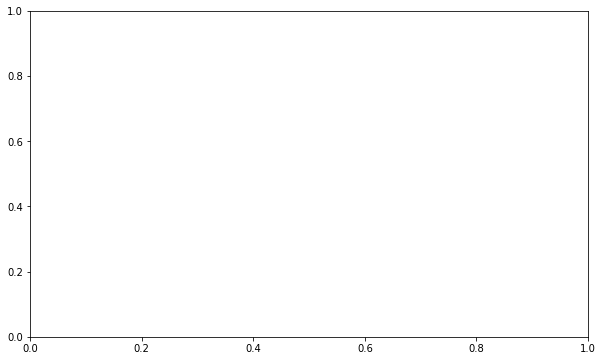

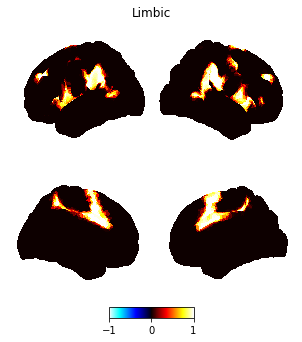

In [8]:
from nilearn.image import math_img
from matplotlib import pyplot as plt

networknames = ['Visual','Somatomotor','Dorsal att.','Ventral att.','Limbic','Frontoparietal','DMN']

f,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,6))
curimg = math_img(f"img==4",img=yeo.thick_7)
plotting.plot_img_on_surf(curimg,title='Dorsal')
# f.savefig('limbic.png')

/home/nfarrugi/miniconda3/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


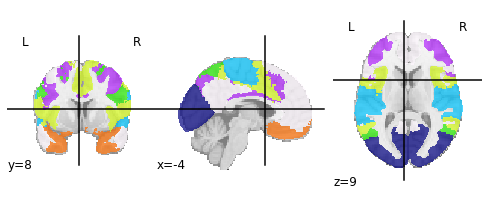

In [23]:
plotting.plot_roi(yeo.thick_7)

In [54]:
diffimgs = dict()
frequencies = ['theta','alpha','low_beta','high_beta']
for j,curfreq in enumerate(frequencies):
    curfile = f"2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz"
    diffimgs[curfreq] = yeomasker.fit_transform(curfile)

NameError: name 'diffimgs' is not defined

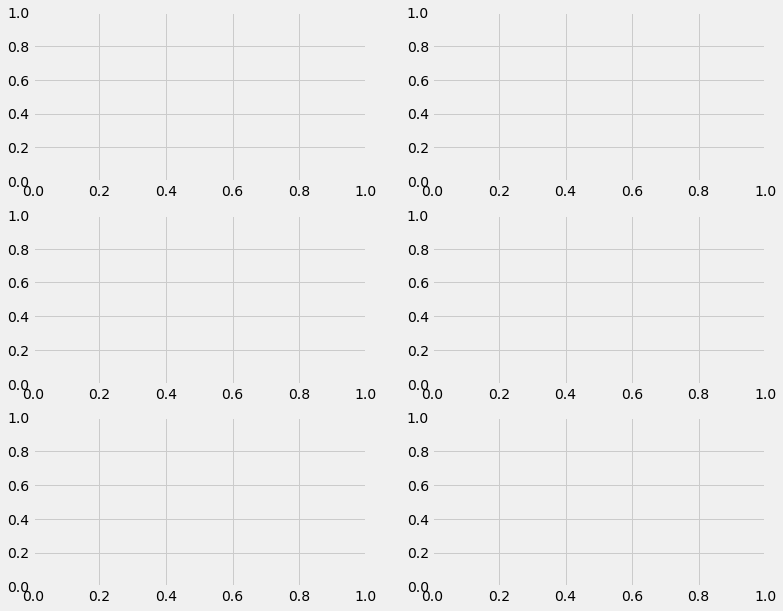

Error in callback <function flush_figures at 0x7ffa129379a0> (for post_execute):


KeyboardInterrupt: 

In [14]:
from matplotlib import pyplot as plt
cm = 1/2.54  # centimeters in inches
f,ax = plt.subplots(nrows=3,ncols=2,figsize=(29.7*cm,25*cm))

frequencies = ['theta','alpha','low_beta']
for j,curfreq in enumerate(frequencies):
    # curfile = f"2nd_level_maps_thresholded/2nd_level_maps_thresholded_at_0.05/diff/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz"
    cur_diff = f"/homes/v20subra/S4B2/Graph-related_analysis/2nd_level_maps_thresholded_at_0.05/PO-BL/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz"

    #cur_diff = yeomasker.fit_transform(cur_diff)

    plotting.plot_img_on_surf(cur_diff,title=curfreq)
    
    
    ax[j,0].bar(networknames,diffimgs[curfreq][0])
    ax[j,0].set_xticklabels(['','','',''], rotation = 45)
    ax[j,0].set_ylim([-0.75,1.2])
    ax[j,0].set_ylabel('SDI Difference')
    
ax[j,0].set_xticklabels(networknames, rotation = 45)

# f.savefig('../talk/etudeVenk/sdidiff.pdf')

/home/nfarrugi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


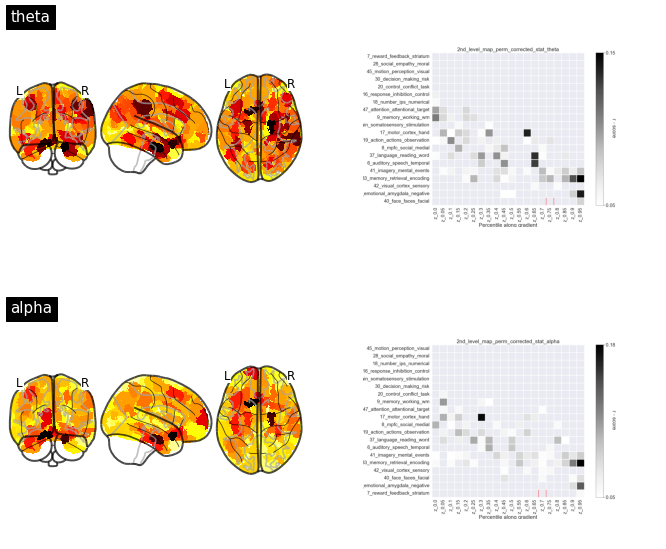

In [73]:
from matplotlib import pyplot as plt
cm = 1/2.54  # centimeters in inches
f,ax = plt.subplots(nrows=2,ncols=2,figsize=(29.7*cm,25*cm))

frequencies = ['theta','alpha']
for j,curfreq in enumerate(frequencies):
    curfile = f"2nd_level_maps/2nd_level_maps/diff/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz"
    #cur_diff = yeomasker.fit_transform(curfile)

    plotting.plot_glass_brain(curfile,figure=f,axes=ax[j,0],title=curfreq)
    
    im = plt.imread(f"png_decoded/png_decoded/2nd_level_map_perm_corrected_stat_{curfreq}.png")
    ax[j,1].imshow(im)
    ax[j,1].axis('off')
    
ax[j,0].set_xticklabels(networknames, rotation = 45)

# f.savefig('../talk/etudeVenk/sdidiff_decoded.pdf')

/tmp/ipykernel_3522344/2865406530.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)


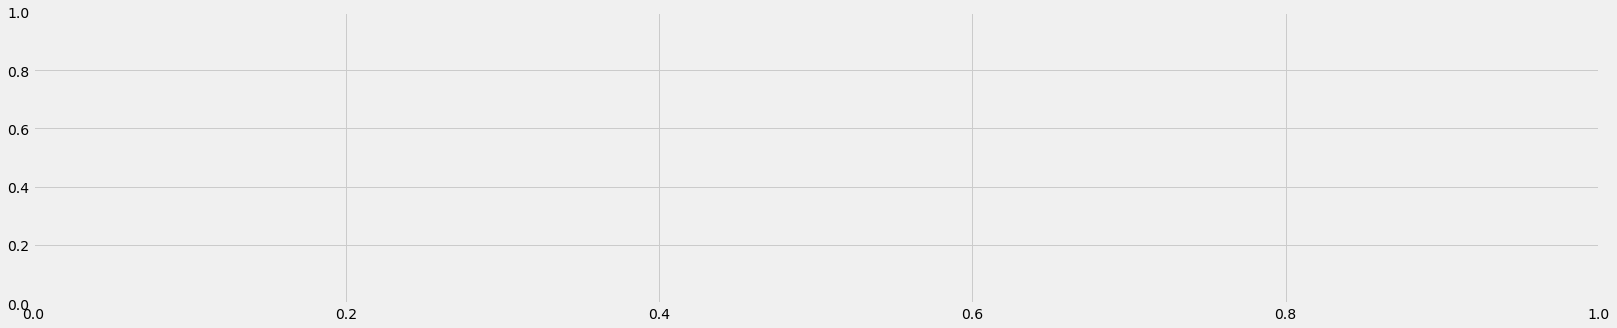

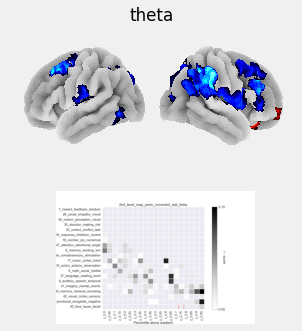

In [56]:
from matplotlib import pyplot as plt
cm = 1/2.54  # centimeters in inches
# f,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,6),squeeze=False)

frequencies = ['theta']
for j,curfreq in enumerate(frequencies):
    curfile = f"/homes/v20subra/S4B2/Graph-related_analysis/2nd_level_maps_thresholded_at_0.05/PO-BL/2nd_level_map_perm_corrected_stat_{curfreq}.nii.gz"

    plt.figure(figsize = (25,11))
    #cur_diff = yeomasker.fit_transform(curfile)
    plt.subplot(211)
    fig, _ = plotting.plot_img_on_surf(curfile, title=curfreq, threshold = 0.1)
    # ax[0, j].plot(fig)
    plt.subplot(212)
    im = plt.imread(f"/homes/v20subra/S4B2/Graph-related_analysis/Decoding_results/Differenced/2nd_level_map_perm_corrected_stat_{curfreq}.png")
    plt.imshow(im)
    plt.axis('off')
    

# f.savefig('../talk/etudeVenk/sdidiff_decoded.pdf')

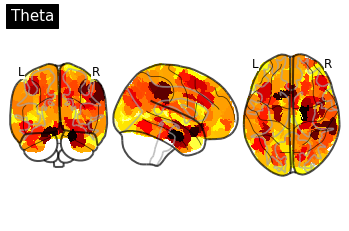

In [80]:
f,ax = plt.subplots(1,1)
plotting.plot_glass_brain("2nd_level_maps/2nd_level_maps/diff/2nd_level_map_perm_corrected_stat_theta.nii.gz",figure=f,axes=ax,title='Theta')
f.savefig('../talk/etudeVenk/theta_unthr.png')

(-0.5, 1499.5, 999.5, -0.5)

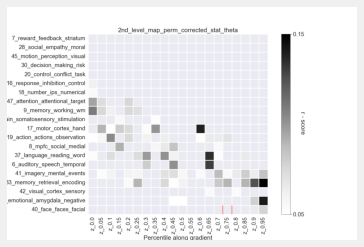

In [54]:
im = plt.imread(f"/homes/v20subra/S4B2/Graph-related_analysis/Decoding_results/Differenced/2nd_level_map_perm_corrected_stat_{curfreq}.png")
plt.imshow(im)
plt.axis('off')

(<Figure size 288x360 with 5 Axes>,
 [<Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes: >])

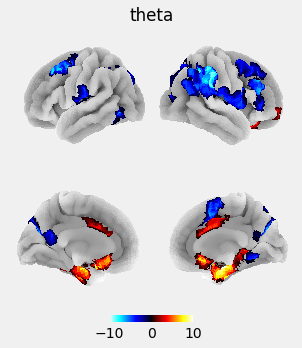

In [57]:
plotting.plot_img_on_surf(curfile, title=curfreq, threshold = 0.1)
